# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [21]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [22]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [23]:
#  1. Get the total rides for each city type
total_rides=pyber_data_df.groupby(["type"]).count()["ride_id"]
#total_rides

In [24]:
# 2. Get the total drivers for each city type
sum_drivers=city_data_df.groupby(["type"]).sum()["driver_count"]

#sum_drivers

In [25]:
#  3. Get the total amount of fares for each city type
sum_fares=pyber_data_df.groupby(["type"], ).sum()["fare"]
#sum_fares

In [26]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride_by_type=sum_fares/total_rides

In [27]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver_by_type=sum_fares /sum_drivers

In [28]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    "Total Rides": total_rides,
    "Total Drivers": sum_drivers,
    "Total Fares": sum_fares,
    "Average Fare per Ride": avg_fare_per_ride_by_type,
    "Average Fare per Driver": avg_fare_per_driver_by_type})


pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [29]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [30]:
#  8. Format the columns.
pyber_summary_df['Total Rides']=pyber_summary_df['Total Rides'].map("{:,}".format)
pyber_summary_df['Total Drivers']=pyber_summary_df['Total Drivers'].map("{:,}".format)
pyber_summary_df['Total Fares']=pyber_summary_df['Total Fares'].map("${:,.2f}".format)
pyber_summary_df['Average Fare per Ride']=pyber_summary_df['Average Fare per Ride'].map("${:.2f}".format)
pyber_summary_df['Average Fare per Driver']=pyber_summary_df['Average Fare per Driver'].map("${:.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [31]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [32]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
df=pyber_data_df.groupby(['type', 'date']).sum()['fare']
df2=pd.DataFrame(df)

In [33]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_data= df2.reset_index()
pyber_data.head()

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [34]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot_data=pyber_data.pivot(index='date', columns='type', values='fare')
pivot_data.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [35]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
new_data=pivot_data.loc['2019-01-01':'2019-04-29']
new_data.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [36]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
new_data.index = pd.to_datetime(new_data.index)
new_data.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [37]:
# 7. Check that the datatype for the index is datetime using df.info()
#new_data.info()

In [38]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
resample_data=new_data.resample('W').sum()

resample_data.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


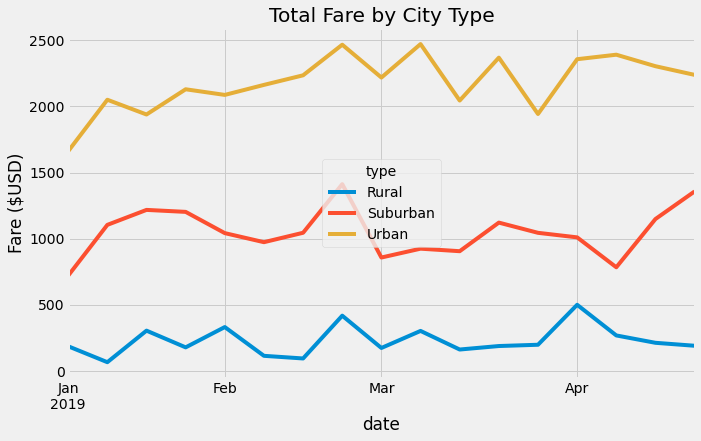

In [42]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

weekly_data = resample_data.plot(figsize=(10, 6))

weekly_data.set_ylabel("Fare ($USD)")
weekly_data.set_title("Total Fare by City Type")
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
plt.savefig("analysis/PyBer_fare_summary.png")
style.use('fivethirtyeight')
plt.show()